# Function iaisdftsym


## Description
Check if the input image is symmetric and return a boolean value. 

## Synopse

Check for conjugate symmetry

- **b = iaisdftsym(F)**

  - **b**: Boolean. 
  - **F**: Image. Complex image.

## Function Code

In [6]:
import numpy as np

def iaisdftsym(F):

    if len(F.shape) == 1: F = F[np.newaxis,np.newaxis,:] 
    if len(F.shape) == 2: F = F[np.newaxis,:,:] 

    n,m,p = F.shape
    x,y,z = np.indices((n,m,p))

    Xnovo = np.mod(-1*x,n) 
    Ynovo = np.mod(-1*y,m)
    Znovo = np.mod(-1*z,p)  

    aux = np.conjugate(F[Xnovo,Ynovo,Znovo])

    return (abs(F-aux)<10E-4).all()

In [7]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ! jupyter nbconvert --to 'python' iaisdftsym
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    ia898path = os.path.abspath('/home/lotufo')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook iaisdftsym.ipynb to python
[NbConvertApp] Writing 3657 bytes to iaisdftsym.py


## Examples


Numeric Example: 1D data

In [8]:
if testing:
    F = np.arange(5)
    print ('Is 1d odd dimension vetor symmetric?',iaisdftsym(F),'\n')
    F =  np.arange(6)
    print ('Is 1d even dimension vetor symmetric?',iaisdftsym(F),'\n')
    F = np.array( [1j,1j,0,1j,1j] )
    print ('Is 1d even dimension vetor symmetric?',iaisdftsym(F),'\n')

Is 1d odd dimension vetor symmetric? False 

Is 1d even dimension vetor symmetric? False 

Is 1d even dimension vetor symmetric? False 



Numeric Example: real matrix

In [9]:
if testing:
    F = np.array( [ [0,1], 
                    [2,3] ] )
    print ('Is function F symmetric?',iaisdftsym(F),'\n')

Is function F symmetric? True 



Numeric Example: imaginary matrix

In [10]:
if testing:
    F = np.array([ [2j,1j], 
                   [1j,2j] ] )
    print('Is function F symmetric?',iaisdftsym(F),'\n')

    F = np.array( [ [ 2j,0, 1j], 
                    [-1j,0,-2j] ] )
    print('Is function F symmetric?',iaisdftsym(F),'\n')

Is function F symmetric? False 

Is function F symmetric? False 



Numeric Example: complex matrix

In [11]:
if testing:
    F = np.array([[10+0j,20+5j,20-5j],
                  [40+3j,60+2j,70+4j],
                  [30+0j,50+2j,50-2j],
                  [40-3j,70-4j,60-2j]])
    print('F=\n',F)
    print('if F symmetrical?', iaisdftsym(F))

F=
 [[ 10.+0.j  20.+5.j  20.-5.j]
 [ 40.+3.j  60.+2.j  70.+4.j]
 [ 30.+0.j  50.+2.j  50.-2.j]
 [ 40.-3.j  70.-4.j  60.-2.j]]
if F symmetrical? True


Numeric Example: Fourier transformation of a real image is symmetric

In [37]:
if testing:
    print('Is this function symmetric?')
    print(iaisdftsym(np.fft.fft2(np.random.rand(100,100)))) # dimension variation
    print(iaisdftsym(np.fft.fft2(np.random.rand(101,100))))
    print(iaisdftsym(np.fft.fft2(np.random.rand(101,101))))

Is this function symmetric?
True
True
True


Image Example: circular filter

Is this filter symmetric? True



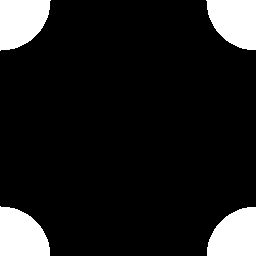
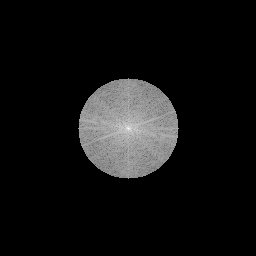

In [38]:
if testing:
    img = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    F = np.fft.fftn(img)
    r1,c1 = np.indices(img.shape)
    imgc = ((r1-img.shape[0]/2)**2/(50)**2) + ((c1-img.shape[1]/2)**2/(50)**2) <= 1
    imgct = ia.ptrans(imgc, (imgc.shape[0]//2, imgc.shape[1]//2))
    nb = ia.nbshow(2)
    nb.nbshow(ia.normalize(imgct),'circular filter')
    res = F * imgct
    nb.nbshow(ia.dftview(res))
    print('Is this filter symmetric?', iaisdftsym(res))
    nb.nbshow()

Image Example 2: retangular filter


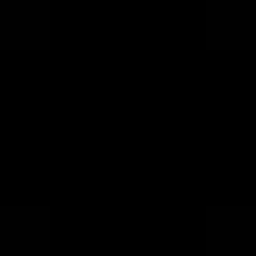
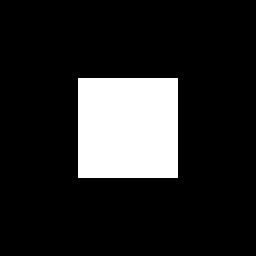

Is this filter symmetric? False


In [39]:
if testing:
    mquadra = np.zeros_like(img)
    mquadra[:50,:50] = 1
    mquadra[-50:,:50] = 1
    mquadra[:50,-50:] = 1
    mquadra[-50:,-50:] = 1

    nb.nbshow(mquadra,'RETANGULO')
    mquadra = ia.ptrans(mquadra, (mquadra.shape[0]//2,mquadra.shape[1]//2))
    nb.nbshow(ia.normalize(mquadra),'retangular filter')
    mfiltrada = F * mquadra                                        
    nb.nbshow()
    print('Is this filter symmetric?', iaisdftsym(mfiltrada))

Equation

$$ \begin{matrix}
   F(s,u,v) = F^{\star}(-s \ mod\ P,-u \ mod\ N, -v \ mod\ M) \\ (0,0,0) \leq (s,u,v) < (P,N,M)
   \end{matrix}
$$

## See also

- `iadftview`

## Contributions

- Mariana Pinheiro, 1st semester 2011
- Leonardo Bianconi, 1st semester 2017